In [2]:
import imp
import examples.models.rdm_fixed as rdm
import pycog
import numpy as np
import matplotlib.pyplot as plt
from jedi import jedi
from jedi.utils import plot, seedutil, func_generator, init_tools

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
reload(pycog)

<module 'pycog' from '/Users/simonhaxby/Code/Python/pycog/pycog/__init__.pyc'>

In [5]:
rdm

<module 'examples.models.rdm_fixed' from '/Users/simonhaxby/Code/Python/pycog/examples/models/rdm_fixed.py'>

In [6]:
rng = np.random.RandomState(2)

In [7]:
params = {
    'callback_results': None,
    'target_output':    True,
    'minibatch_index':  1,
    'best_costs':       None,
    'name':             "gradient"
    }

In [43]:
trials = [rdm.generate_trial(rng, 1, params) for _
          in range(20)]
trials[0]['epochs']

{'T': 2000}

In [54]:
trial = trials[1]
print trial['outputs'].shape
print trial['inputs'].shape

(1200, 2)
(1200, 2)


(-0.5, 1.5)

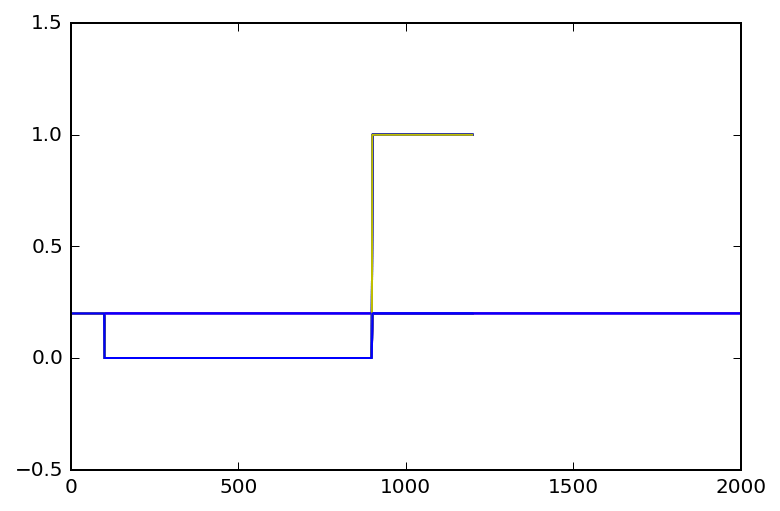

In [56]:
for trial in trials:
    plt.plot(range(len(trial['outputs'][:,1])), trial['outputs'][:,1])
    plt.plot(range(len(trial['outputs'][:,0])), trial['outputs'][:,0], 'b')
plt.ylim(-.5,1.5)

(-0.5, 1.5)

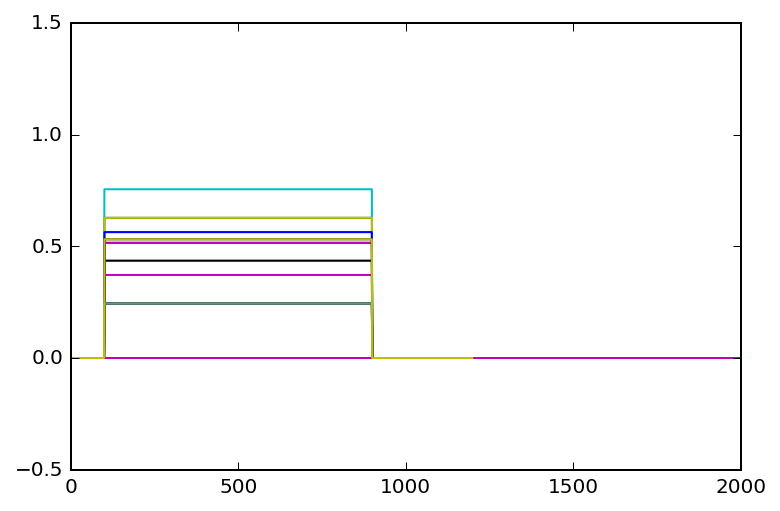

In [47]:
for trial in trials:
    plt.plot(range(len(trial['inputs'][:,1])), trial['inputs'][:,1])
    #plt.plot(range(len(trial['inputs'][:,0])), trial['inputs'][:,0], 'b')
plt.ylim(-.5,1.5)

In [61]:
# simulation parameters for FORCE
dt = .01      # time step
tstart = 0 # learning start time
tstop = 5  # learning stop time
rho = 1.02   # spectral radius of J
N = 300      # size of stochastic pool
lr = 1.0   # learning rate
pE = .8 # percent excitatory
sparsity = (.1,1,1) # sparsity
I = 1

In [62]:
errors = []
wus = []
zs = []
ts = []
w_ = None
seedling = 25

J, Wz, Wi, x0, u, w = init_tools.set_simulation_parameters(seedling, N, I, pE=pE, p=sparsity, rho=rho)

for trial in trials[:5]:
    targets = trial['outputs'][:,1]
    inputs = trial['inputs'][:,1]
    tmax = float(len(targets))/100-.01
    
    
    if w_ is not None:
        w = w_
        x0 = x[-1]
    
    # inp & z are dummy variables
    def model(t0, x, params):
        i = params['index']
        tanh_x = params['tanh_x']
        z = params['z']
        inp = params['inputs'][i]
        return (-x + np.dot(J, tanh_x) + np.dot(Wi, inp) + Wz*z)/dt
    
    x, t, z, w_, wu, _ = jedi.force(targets, model, lr, dt, tmax, tstart, tstop, x0, w, 
                                    inputs=inputs)

    zs.append(z)
    wus.append(wu)
    ts.append(t)
    
    error = np.abs(z[1:]-np.array(targets))
    errors.append(error)
    
errors = np.array(errors)

Simulation run-time (wall): 2.175 seconds
Simulation run-time (wall): 1.747 seconds
Simulation run-time (wall): 2.455 seconds
Simulation run-time (wall): 1.711 seconds
Simulation run-time (wall): 1.261 seconds


In [63]:
tmax

4.99

In [64]:
k = 0

1


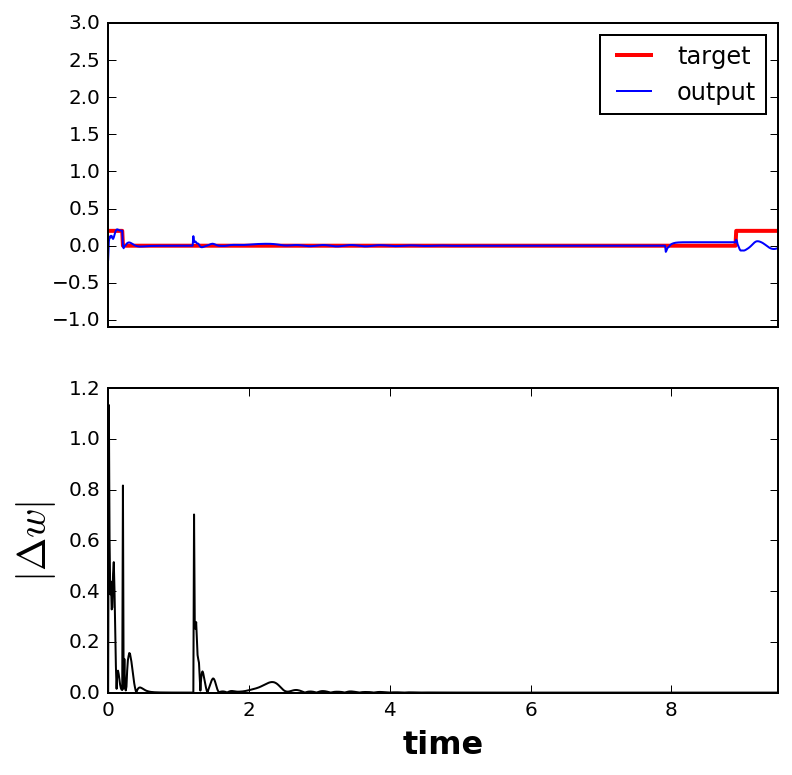

In [65]:
plt.figure(figsize=(6,6))
plot.target_vs_output_plus_error(ts[k], zs[k], wus[k], trials[k]['outputs'][:,1], offset=1, log=False)
k+=1
print(k)